# **TỔNG QUAN**

## Khái Niệm

`Priority Queue` không phải là một kiểu dữ liệu cụ thể, mà đúng hơn là một ý tưởng trong lập trình. Đây là một hàng đợi nhưng có điểm đặc biệt:

1. Mỗi phần tử được gắn với một "độ ưu tiên".
2. Phần tử có độ ưu tiên cao hơn sẽ được lấy ra trước.
3. Nếu hai phần tử có cùng độ ưu tiên, thì phần tử nào thêm vào trước sẽ được lấy trước.

Ví dụ: Trong thuật toán tìm đường đi ngắn nhất (Dijkstra), ta cần ưu tiên các đỉnh có khoảng cách ngắn hơn, nên sẽ đưa chúng lên đầu để xử lý trước.

## Heap là gì?

`Heap` là cách phổ biến để xây dựng `Priority Queue`. Có thể hiểu `heap` là một dạng `cây nhị phân + sắp xếp theo độ ưu tiên`. Dựa vào `độ ưu tiên` chia `heap` thành 2 loại:

- **Max heap**: node cha có giá trị lớn hơn node con
- **Min heap**: node cha có giá trị bé hơn node con


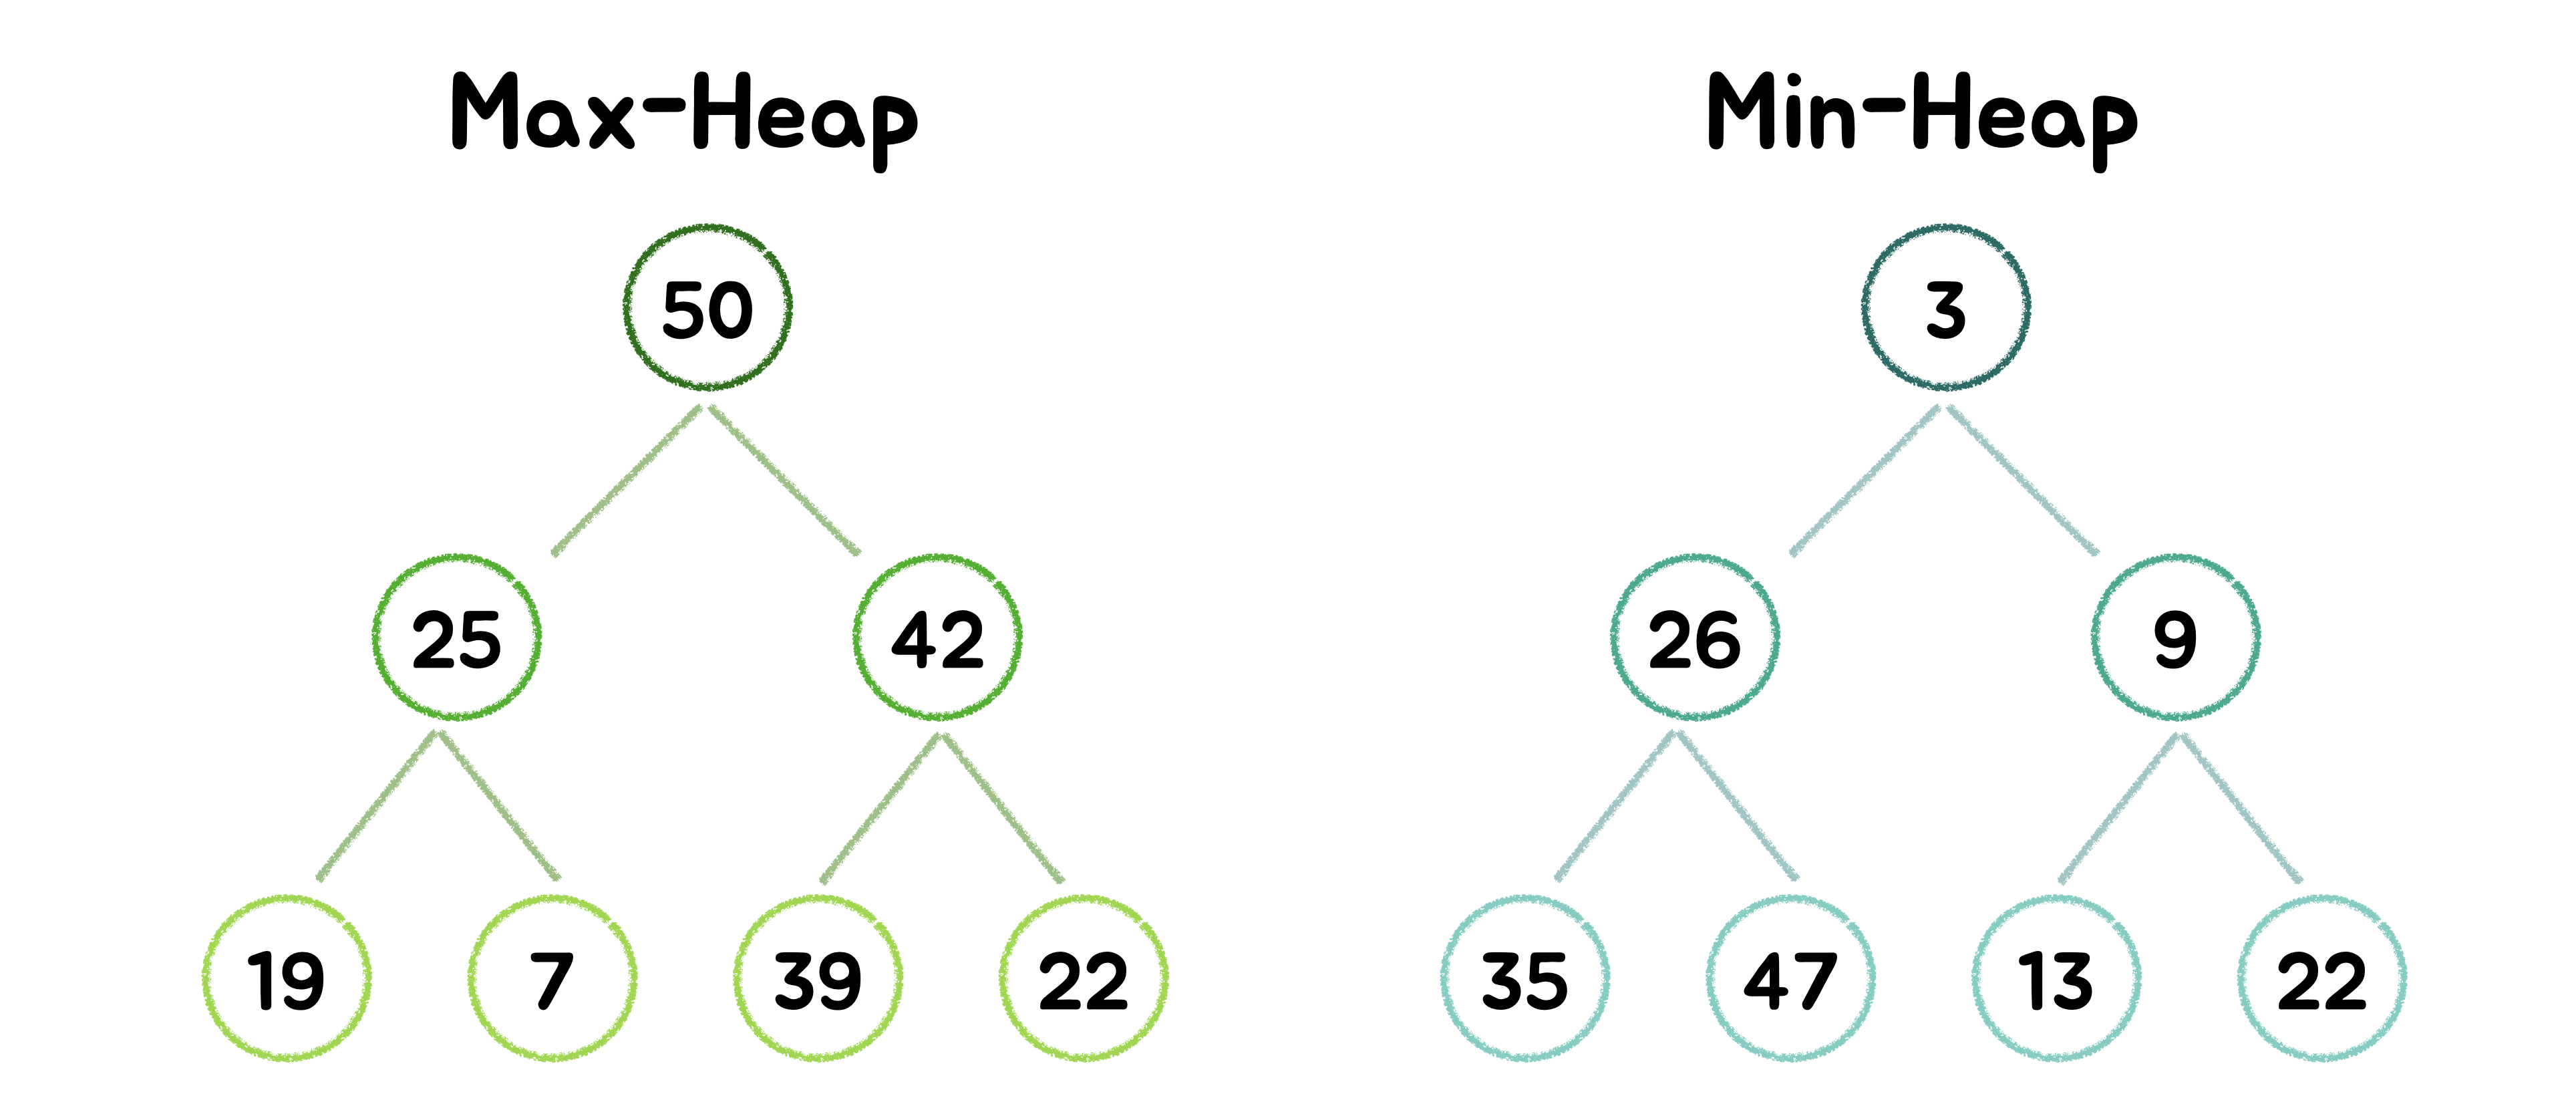

## Cách Cài Đặt

Dù `heap` có cấu trúc giống cây nhị phân, nhưng thường được cài đặt bằng mảng vì dễ tính toán và tiết kiệm bộ nhớ. Cách đánh số như sau:

- Vị trí `i` là node cha.
- `2i + 1` là node con bên trái.
- `2i + 2` là node con bên phải.

## Ứng Dụng

- Tìm đường đi ngắn nhất (Dijkstra).
- Sắp xếp bằng heap (heap sort).


[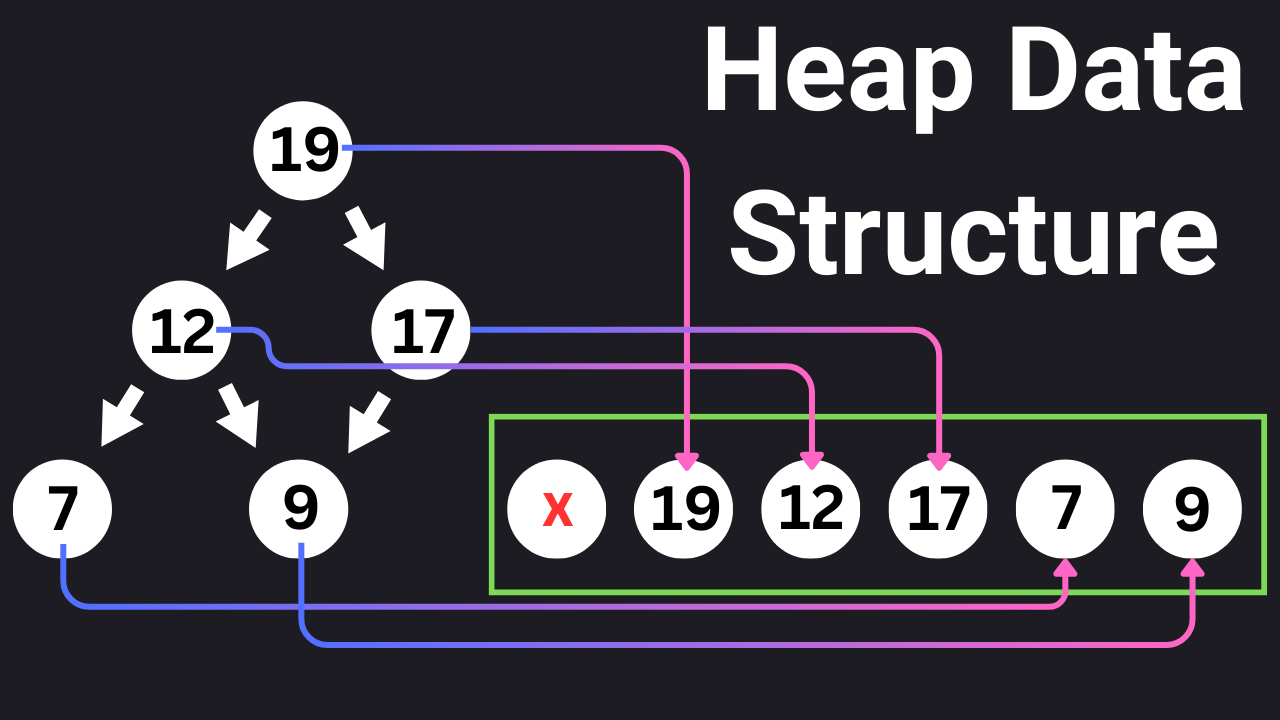](https://www.youtube.com/watch?v=0wPlzMU-k00)

---


# **THAO TÁC**

## Heaptify
`Heaptify` là thuật toán đảm bảo cấu trúc `heap` của `heap` 😂😂🤣🤣. `Heaptify` được chia làm 2 loại:

1. `Heaptify-up`: là đi ngược từ phần tử thứ `i` (trong trường hợp thêm i sẽ là vị trí phần tử mới được thêm vào) đi lên `root` của `heap`. Mỗi đi ta sẽ tìm `phần tử cha` hiện tại của `i`: `parent_index = (i -1) //2` sau đó tiến hành so sánh dựa vào `max-heap` hay `min-heap` (`min-heap` phần tử cha phải nhỏ hơn phần tử con và ngược lại với `max-heap`)

2. `Heaptify-down`: là đi từ phần tử thứ `i` đi xuống cho đến `phần tử cuối cùng` của `heap`. Mỗi lần thực hiện ta sẽ so sánh giá trị của phần tử `i` với `2 phần tử con` (left và right) của chính nó, nếu có `phần tử con` nào nhỏ hơn phần tử `i` thì thực hiện `hoán đổi giá trị` rồi tiếp tục thực hiện `heaptify-down` từ `phần tử mới được hoán đổi` trước đó

## Thêm (Add/Push)
Vì heap được tổ chức theo ý tưởng `queue` nên khi thêm chúng ta cũng sẽ thêm vào vị trí cuối. Khi thêm vào xong chúng ta phải kiểm tra xem `heap` đã đúng cấu trúc chưa (cấu trúc `min-heap` hay `max-heap`) tại vì chúng ta khi thêm là cứ thêm vào vị trí cuối nên cấu trúc `heap` không được bảo đảm nên ta phải thực hiện `heaptify-up`:

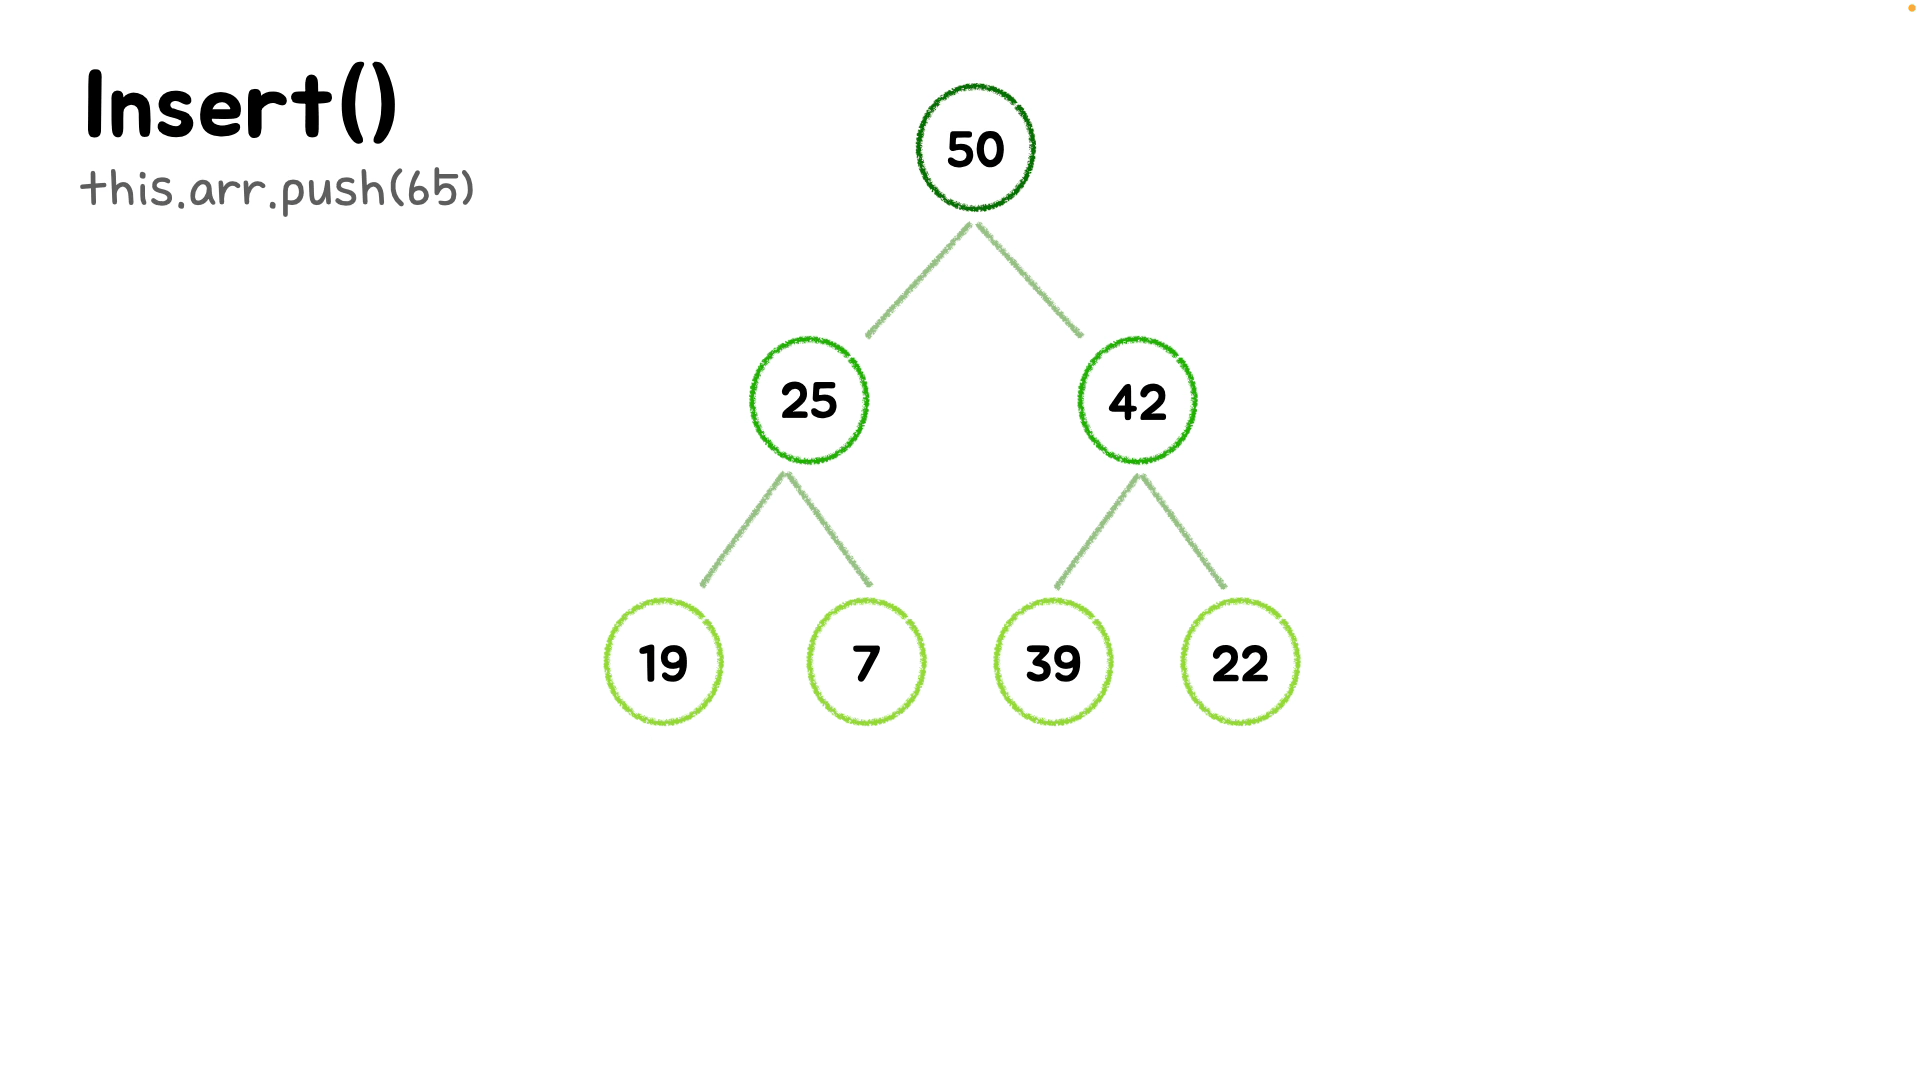


## Xóa (Poll/Remove)
Cũng tương tự như `queue`, `Heap` cũng sẽ trả về phần tử `đầu tiên` đồng thời `xóa` nó ra khỏi mảng. Sau khi xóa để đảm bảo `cấu trúc heap` ta sẽ lấy `phần tử cuối cùng` gán vào `phần tử đầu` (hoán đổi giá trị đầu và cuối - lúc này phần tử đầu tiên vẫn còn tồn tại - rồi sau đó mới xóa phần tử cần xóa, chuyển bài toán từ xóa phần tử đầu thành xóa phần tử cuối) rồi sau đó thực hiện `heaptify-down` từ phần tử root (hay phần tử 0). Đối với trường hợp `xóa một phần tử bất kì`, thì cách làm cũng tương tự, ta cũng sẽ hoán đổi giá trị giữa phần tử cuối với phần tử cần xóa, nhưng thay vì chỉ thực hiện `heaptify-down` chúng ta phải xét trường hợp để sử dụng `phiên bản` nào của `heaptify`. **Ví dụ:**

- TRƯỜNG HỢP 1:

           10
        /      \
      20        30
      /  \      /
      40   50   5

- Khi ta xóa 20 nó sẽ trở thành:

           10
        /      \
       5       30
      /  \      
      40   50   

- Lúc này ta sẽ phải thực hiện `heaptify-up` để đẩy 5 lên trên


- TRƯỜNG HỢP 2:

           10
        /      \
      20        30
      /  \      /
      40   50   60

- Khi ta xóa 60 nó sẽ thành
           10
        /      \
       60       30
      /  \      
      40   50
- Chúng ta sẽ thực hiện `heaptify-down`


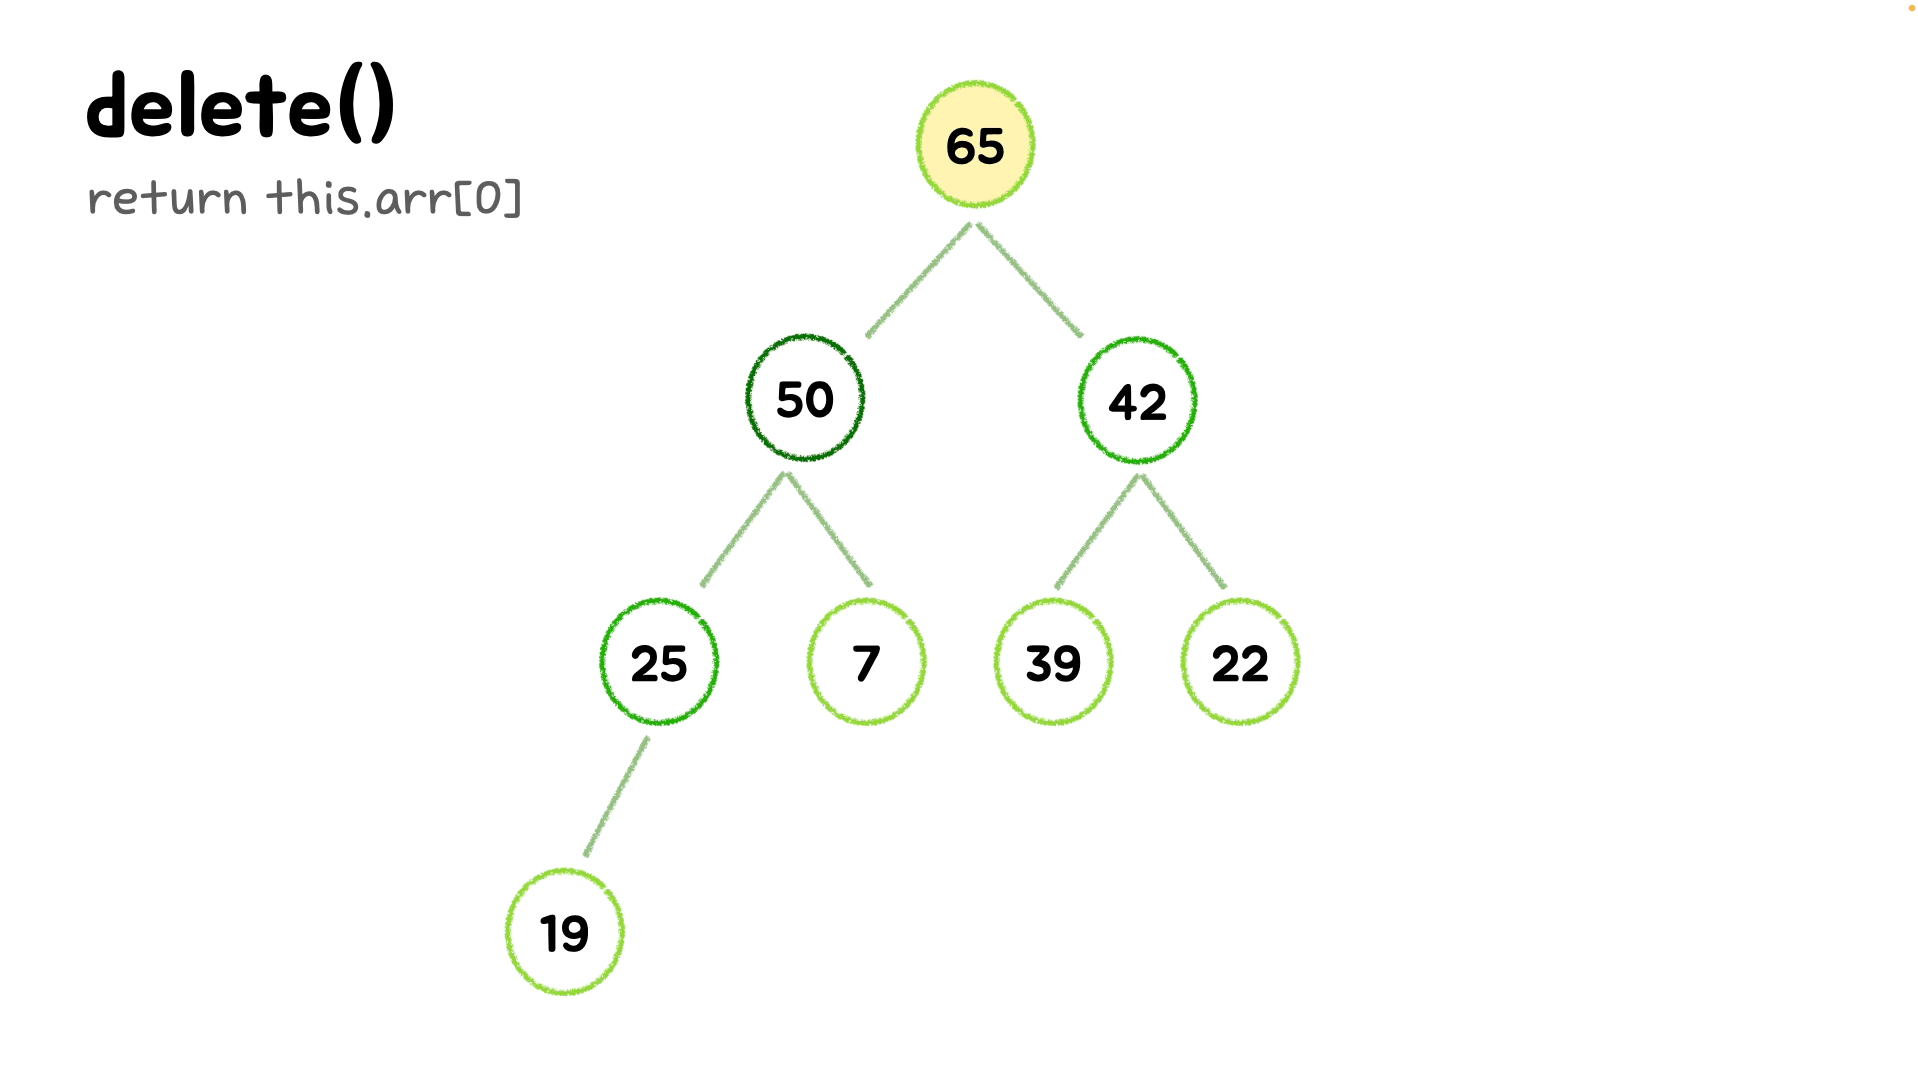

---

# **CODE**
Trong bài `notebook` này tôi sẽ xây dựng lại cấu trúc `Heap` (Min Heap)  bằng `Python` mà không sử dụng bất kì thư viện hổ trợ nào. Do `notebook` chỉ mang tính học tập và tham khảo nếu có sai sót mong các bạn góp ý và thông cảm bỏ qua 😌😌😌

In [ ]:
class Heap:
  def __init__(self):
    self.queue = []
    self.length = 0

  def add(self, val: int):
    self.queue.append(val)
    self.length += 1
    self.heaptify_up(self.length - 1)

  def poll(self, index=0) -> int:
    if not self.isEmpty():
      result = self.queue[index]
      self.queue[index] = self.queue[-1]
      self.queue.pop()
      self.length -= 1
      parent_index = (index -1) // 2

      if parent_index >= 0 and self.queue[parent_index] > self.queue[index]:
        self.heaptify_up(index)
      else:
        self.heaptify_down(index)

      return result
    return -1

  def peek(self) -> int:
    if not self.isEmpty():
      return self.queue[0]

  def heaptify_up(self, index):
    if not self.isEmpty():
      cur_index = index
      parent_index = (cur_index -1) // 2
      while cur_index > 0 and self.queue[parent_index] > self.queue[cur_index]:
        self.queue[parent_index], self.queue[cur_index] = self.queue[cur_index], self.queue[parent_index]
        cur_index = parent_index
        parent_index = (cur_index -1) // 2

  def heaptify(self, parent_index):
    left_index = parent_index * 2 + 1
    right_index = parent_index * 2 + 2
    smallest_index = parent_index

    if left_index < self.length and self.queue[smallest_index] > self.queue[left_index]:
      smallest_index = left_index

    if right_index < self.length and self.queue[smallest_index] > self.queue[right_index]:
      smallest_index = right_index

    if smallest_index != parent_index:
      self.queue[smallest_index], self.queue[parent_index] = self.queue[parent_index], self.queue[smallest_index]
      self.heaptify(smallest_index)

  def heaptify_down(self, index=0):
    self.heaptify(index)

  def isEmpty(self):
    return self.length == 0

  def toString(self):
    print(self.queue)

In [ ]:
# Test case chức năng thêm
myHeap = Heap()
heap = [1, 3, 5, 7, 9, 6, 8, 10, 12, 15, 13, 20, 30, 17, 25]
for i in heap:
  myHeap.add(i)
myHeap.toString()

[1, 3, 5, 7, 9, 6, 8, 10, 12, 15, 13, 20, 30, 17, 25]


In [ ]:
# Test case xóa (poll)
print("Xóa node gốc")
myHeap.poll()
myHeap.toString()
print("Xóa node bất kì")
myHeap.poll(5)
myHeap.toString()

Xóa node gốc
[3, 7, 5, 10, 9, 6, 8, 25, 12, 15, 13, 20, 30, 17]
Xóa node bất kì
[3, 7, 5, 10, 9, 17, 8, 25, 12, 15, 13, 20, 30]


---
# **MỘT SỐ BÀI TẬP RÈN LUYỆN**
Phần này tôi sẽ cung cấp cho bạn một số bài tập mang tính `heap` nhất từ `LEETCODE` để bạn có thể rèn luyện thêm nhé 😘😘😘

## **[LEETCODE 912. Sort an Arrays](https://leetcode.com/problems/sort-an-array/description/)** **`MEDIUM`**

Given an array of integers nums, sort the array in ascending order and return it.

You must solve the problem without using any built-in functions in O(nlog(n)) time complexity and with the smallest space complexity possible.

In [ ]:
### Đối với bài toán này chỉ đơn giản là kêu chúng ta viết một hàm sắp xếp tăng dần với độ phực tạp
### là O(nlogn). Chúng ta có thể hoàn toàn sử dụng mergesort, quicksort (tôi sẽ đề cập trong chương
### sắp xếp) nhưng vì chúng ta đang học về heap nên tôi sẽ sử dụng heap-sort để giải quyết bài toán
### này (1 trong những ứng dụng của heapsort)

### Ý tưởng (min-heap): đầu tiên thay vì xây dựng nguyên cây min-heap tốn O(nlogn) thì ta chỉ cần đưa giá trị nhỏ nhất
### lên đầu điều đó chỉ tốn O(n//2 * logn) chính vì thế sẽ tiết kiệm thời gian rất nhiều, [1] sau khi đưa giá trị nhỏ nhất
### lên đỉnh ta sẽ tiến hành thực hiện thao tác xóa phần tử đầu (đang là phần tử nhỏ nhất) rồi đưa vào kết quả, rồi sau
### đó để đảm bảo tính chất heap ta sẽ thực hiện heaptify với phần tử  đầu tiên rồi làm [1] cho đến khi hết heap

class Solution:
    # Heaptify
    def heaptify(self, nums , index):
        left = 2 * index + 1
        right = 2 * index + 2
        smallest_index = index
        if left < len(nums) and nums[smallest_index] > nums[left]:
            smallest_index = left

        if right < len(nums) and nums[smallest_index] > nums[right]:
            smallest_index = right

        if index != smallest_index:
            nums[smallest_index] , nums[index] = nums[index] , nums[smallest_index]
            self.heaptify(nums, smallest_index)

    def sortArray(self, nums: List[int]) -> List[int]:
        # Đưa giá trị nhỏ nhất lên đỉnh O(n//2 * logn)
        for i in range(len(nums) //2 , -1 , -1):
            self.heaptify(nums, i)

        result = []
        # Tiến hành sort
        for i in range(len(nums)):
            # Thực hiện thao tác xóa phần từ đầu ở heap
            # swap giá trị đầu và cuối của heap
            nums[0], nums[-1] = nums[-1], nums[0]

            # Đưa vào biến kết quả ta sẽ có được mảng tăng dần
            result.append(nums.pop())
            self.heaptify(nums, 0)

        return result

## **[LEETCODE 215. Kth Largest Element in an Array](https://leetcode.com/problems/kth-largest-element-in-an-array/description/)** **`MEDIUM`**

Given an integer array nums and an integer k, return the kth largest element in the array.

Note that it is the kth largest element in the sorted order, not the kth distinct element.

Can you solve it without sorting?

In [ ]:
### Do đề bài yêu cầu không sử dụng sắp sếp. Nên với bài này ta sẽ cố gắng xây dựng một cây min-heap có k phần tử, mỗi khi heap có số lượng
### lớn hơn k thì ta pop nó đi (điều này vô tình sẽ pop hết các phần từ có giá trị nhỏ lại hết chỉ
### chừa lại k phần tử lớn nhất trong heap). Cuối cùng ta sẽ lấy phần từ đầu tiên trong heap cũng
### là phần tử lớn thứ k trong mảng

import heapq
class Solution:
    def findKthLargest(self, nums: List[int], k: int) -> int:
        # Khởi tạo mảng để chưa heap
        result = []
        for num in nums:
            # Tiến hành đưa vào heap
            heapq.heappush(result,num)
            # Nếu độ dại của heap lớn hơn đề bài yêu cầu thì pop nó ra
            if len(result) > k:
                heapq.heappop(result)
        return result[0]



## **[LEETCODE 347. Top K Frequent Elements](https://leetcode.com/problems/top-k-frequent-elements/description/)** **`MEDIUM`**

Given an integer array nums and an integer k, return the k most frequent elements. You may return the answer in any order.


Follow up: Your algorithm's time complexity must be better than O(n log n), where n is the array's size.

In [ ]:
### Bài toán này yêu cầu ta trả về k phần tử có số lần xuất hiện nhiều nhất.
### Ta có thể dễ dàng dùng bucket sort để giải quyết bài toán này.
### Tuy nhiên, chương sắp xếp (sort) sẽ được nói rõ ở chương sau, nên tôi sẽ loại bỏ cách này và thay vào đó sử dụng heap để giải quyết bài toán.

### Ý tưởng: Đầu tiên, ta sẽ xây dựng một dictionary (tôi cũng sẽ đề cập đến ở các bài notebook sau)
### chứa các cặp (key, value) = (giá trị, tần suất xuất hiện).
### Sau đó, ta sẽ đưa từng cặp này vào min-heap với tối đa k phần tử, với độ ưu tiên là frequency (tần suất).
### Nếu độ dài của heap lớn hơn k thì ta sẽ pop phần tử nhỏ nhất ra.
### (Logic tương tự như bài trước.) Khi đó, heap sẽ chứa k phần tử có frequency cao nhất.


class Solution:
    import heapq
    def topKFrequent(self, nums: List[int], k: int) -> List[int]:
        # Tạo một dictionary
        mydict = {}
        # Và mảng để chứa heap
        heap = []

        # Duyệt mảng, nếu chưa có thì thêm vô và frequency ban đầu là 1, nếu có rồi
        # thì tăng lên 1 đơn vị
        for i in nums:
            if i not in mydict:
                mydict[i] = 1
            else:
                mydict[i] += 1

        # Tiến hành đưa vào heap
        for key , value in mydict.items():
            heapq.heappush(heap, [value,key])
            # Nếu độ dài mảng lơn hơn đề bài yêu cầu pop
            if len(heap) > k:
                heapq.heappop(heap)

        # Kết quả
        result = []

        # Gán giá trị có frequency cao nhất vào kết quả
        for i in heap:
            result.append(i[1])

        return result

## **[LEETCODE 23. Merge k Sorted Lists](https://leetcode.com/problems/merge-k-sorted-lists/description)** **`HARD`**

You are given an array of k linked-lists lists, each linked-list is sorted in ascending order.

Merge all the linked-lists into one sorted linked-list and return it.

In [ ]:
### Bài này yêu cầu ta trộn k link-list được sắp xếp tăng dần lại với nhau. Nếu đã biết merge sort thì quá đơn giản
### chỉ cần sort từng link-list lại với nhau là được. Nhưng trong bài notebook này tôi sẽ cố gắng giải bài này bằng
### cách sử dụng heap

### Ý tưởng: Đầu tiên ta sẽ đưa các giá trị trong các link-list vào min-heap rồi sau đó, ta sẽ từ từ lấy giá trị bé
### nhất của heap ra (thao tác pop) và gán vào link-list của kết quả -> tạo thành một chuỗi tăng dần


# Definition for singly-linked list.
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

import heapq
class Solution:
    def mergeKLists(self, lists: List[Optional[ListNode]]) -> Optional[ListNode]:
        # Tạo mảng chứa heap
        min_heap = []

        # Một dummies để chứa kết quả
        result = ListNode(0)

        cur = result

        # duyệt hết các link-list và đưa giá trị của nó vào heap
        for l in lists:
            while l:
                heapq.heappush(min_heap, l.val)
                l = l.next

        # Tiến hành duyệt heap, và lấy phần từ đầu nhỏ nhất ra (phần tử đầu trong min-heap) và
        # đưa vào result
        while min_heap:
            cur.next = ListNode(heapq.heappop(min_heap))
            cur = cur.next

        return result.next

# TADA HẾT RỒI !!! 🥳🥳🥳🥳

Cảm ơn các bạn đã đọc hết bài `notebook` này, mong các bạn góp ý và ủng hộ mình trong các bài `notebook` tiếp theo về `DSA` nhé 😌😌😌